In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.describe().round()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.0,215.0,215.0,215.0,215.0,215.0,148.0
mean,108.0,67.0,66.0,66.0,72.0,62.0,288655.0
std,62.0,11.0,11.0,7.0,13.0,6.0,93457.0
min,1.0,41.0,37.0,50.0,50.0,51.0,200000.0
25%,54.0,61.0,61.0,61.0,60.0,58.0,240000.0
50%,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
75%,162.0,76.0,73.0,72.0,84.0,66.0,300000.0
max,215.0,89.0,98.0,91.0,98.0,78.0,940000.0


### Q1. Exploratory Data Analysis (EDA) Distribution of salary by gender, work experience, and specialization.

**Average salary by:**
1. Degree type
2. Work experience
3. MBA specialization

In [8]:
df.groupby("degree_t")['salary'].mean().round()

degree_t
Comm&Mgmt    278627.0
Others       280400.0
Sci&Tech     314610.0
Name: salary, dtype: float64

In [9]:
df.groupby("workex")['salary'].mean()

workex
No     277523.809524
Yes    303265.625000
Name: salary, dtype: float64

In [10]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [11]:
df.groupby("specialisation")['salary'].mean()

specialisation
Mkt&Fin    298852.631579
Mkt&HR     270377.358491
Name: salary, dtype: float64

### Q2. Find all the outliers in salary and show the data of students who gets very high salary 

<Axes: xlabel='salary', ylabel='Count'>

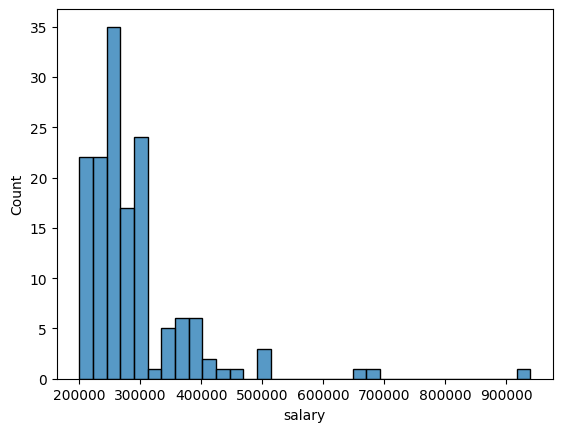

In [12]:
sns.histplot(data=df,x="salary")

<Axes: xlabel='salary'>

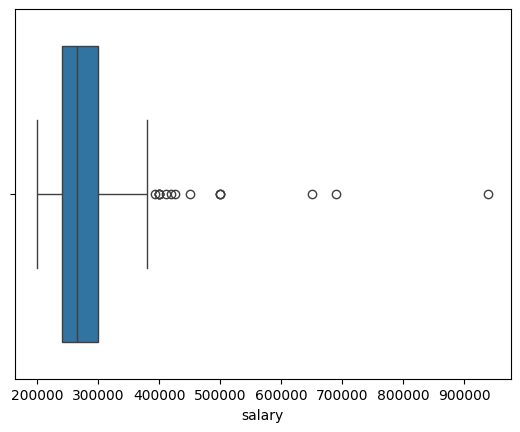

In [13]:
sns.boxplot(data=df,x="salary")

In [14]:
q1 = df['salary'].quantile(0.25)
q1

np.float64(240000.0)

In [15]:
q3 = df['salary'].quantile(0.75)
q3

np.float64(300000.0)

In [16]:
iqr = q3-q1

In [17]:
ub = q3 +iqr*1.5
ub

np.float64(390000.0)

In [19]:
df[df['salary'] > ub ]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
21,22,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,Placed,393000.0
39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.0
53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0
85,86,F,83.84,Others,89.83,Others,Commerce,77.20,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0
95,96,M,73.00,Central,78.00,Others,Commerce,65.00,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000.0
145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,63.23,Placed,400000.0


### Q3. On the bases of MBA percentage create 3 group and find out the average placement rate in each group -
**Below 60% -> "Low"**

**Between 60%-70% -> "Average"**

**Above 70% -> "Good"**

In [20]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [22]:
df['MBA Grade'] = df['mba_p'].apply(
    lambda x: "Low" if x <60 else "Average" if x<70 else "Good"
)

In [23]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,MBA Grade
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,Low
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,Average
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,Low
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,Low
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,Low


In [27]:
a3 = df.pivot_table(index='MBA Grade',columns='status',values='sl_no',aggfunc='count').reset_index()

In [29]:
a3['total'] = a3['Not Placed'] + a3['Placed']

In [34]:
a3['placement rate'] =  (a3['Placed'] / a3['total'] * 100).round(2)

In [36]:
a3.sort_values(by='placement rate', ascending=False)

status,MBA Grade,Not Placed,Placed,total,placement rate
1,Good,5,19,24,79.17
0,Average,34,76,110,69.09
2,Low,28,53,81,65.43


### Q4. Is there a correlation between MBA percentage and salary?

In [37]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,MBA Grade
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,Low
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,Average
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,Low
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,Low
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,Low


<Axes: xlabel='mba_p', ylabel='salary'>

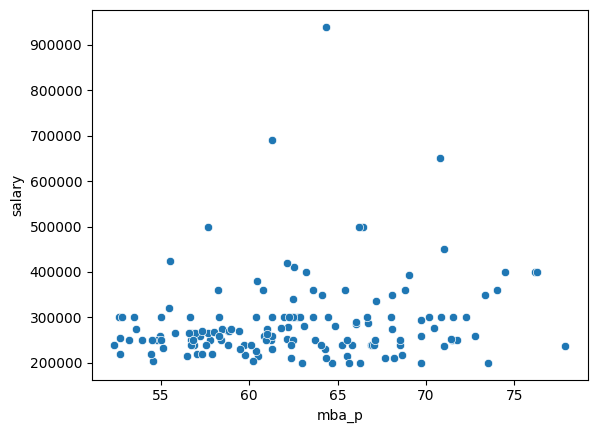

In [38]:
sns.scatterplot(data=df,x='mba_p',y='salary')

<Axes: xlabel='mba_p', ylabel='salary'>

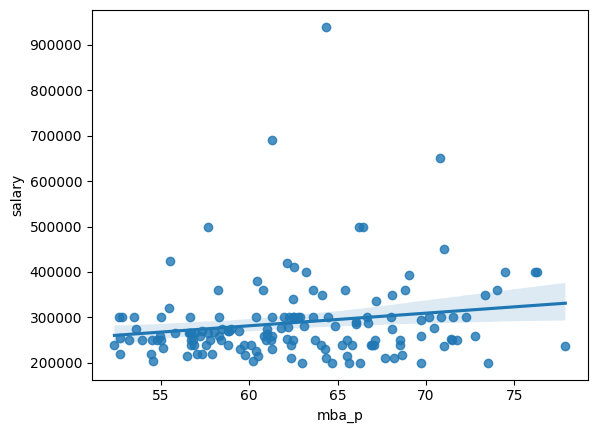

In [39]:
sns.regplot(data=df,x='mba_p',y='salary')

In [40]:
df['mba_p'].corr(df['salary'])

np.float64(0.1750129406952748)

### Q5. Create a single score by using weighted average score of 10, 12, college and MAB
weights :

1. MBA - 10
2. College - 8
3. 12th - 7
4. 10th - 5
   
**total weight = 30**

In [41]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,MBA Grade
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,Low
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,Average
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,Low
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,Low
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,Low


In [45]:
df['overall percentage'] = ((df['ssc_p']*5 + df['hsc_p'] * 7 + df['degree_p'] * 8 + df['mba_p'] *10 )/ 30).round(2)

In [46]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,MBA Grade,overall percentage
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,Low,67.47
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,Average,74.25
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,Low,63.03
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,Low,55.14
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,Low,69.52


### Q6. Find how much percentage of people are placed on the bases of high school specialization

In [47]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,MBA Grade,overall percentage
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,Low,67.47
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,Average,74.25
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,Low,63.03
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,Low,55.14
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,Low,69.52


In [50]:
a6 = df.pivot_table(index='hsc_s',columns='status',values='sl_no',aggfunc='count').reset_index()

In [52]:
a6['total'] = a6['Placed'] + a6['Not Placed']

In [58]:
a6['place%'] = (a6['Placed'] / a6['total'] *100).round(2)

In [59]:
a6.sort_values(by='place%',ascending=False)

status,hsc_s,Not Placed,Placed,total,place%
1,Commerce,34,79,113,69.91
2,Science,28,63,91,69.23
0,Arts,5,6,11,54.55


### Q.7 Find if work experiance affect salary level ?

In [60]:
df.groupby("workex")['salary'].mean()

workex
No     277523.809524
Yes    303265.625000
Name: salary, dtype: float64

### Q8. Find the top 5 students who get the highest salary?

In [62]:
df.sort_values(by='salary',ascending=False).head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,MBA Grade,overall percentage
119,120,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0,Average,64.77
150,151,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0,Average,61.42
177,178,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0,Good,79.47
77,78,M,64.0,Others,80.00,Others,Science,65.0,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0,Low,65.88
163,164,M,63.0,Others,67.00,Others,Science,64.0,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.0,Average,65.35


### Q9. What is the placement percentage of male vs female?

In [65]:
a9 = df.pivot_table(index='gender',columns="status",values='sl_no',aggfunc='count').reset_index()

In [67]:
a9['total'] = a9['Placed'] + a9['Not Placed']

In [69]:
a9['place%'] = (a9['Placed'] / a9['total'] * 100).round(2)

In [70]:
a9

status,gender,Not Placed,Placed,total,place%
0,F,28,48,76,63.16
1,M,39,100,139,71.94


### Q10. How do academic scores (SSC, HSC, Degree) vary between placed and not placed students?

In [71]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,MBA Grade,overall percentage
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,Low,67.47
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,Average,74.25
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,Low,63.03
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,Low,55.14
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,Low,69.52


In [74]:
df.groupby("status")[['ssc_p','hsc_p','degree_p']].mean().reset_index().round(2)


,status,ssc_p,hsc_p,degree_p
0,Not Placed,57.54,58.40,61.13
1,Placed,71.72,69.93,68.74
